### Feature Representation and Model building with Naive Bayes

In [1]:
#importing libraries

import numpy as np 
import pandas as pd 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

In [26]:
data = pd.read_csv('Data/comment.csv')

In [27]:
### Separating Independent and Dependent features
X = data['Comments']
y = data['Sentiment']
z = data['Aspect']

In [4]:
X.duplicated().sum()

112

In [5]:
X.isnull().sum().sum()

0

In [6]:
y.isnull().sum().sum()

0

In [28]:
z.isnull().sum().sum()

0

In [37]:
## Data splitting for training and testing set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [29]:
## Data splitting for training and testing set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,z,test_size=0.2,random_state=42)

In [38]:
print(X_train.shape)
print(X_test.shape)

(1186,)
(297,)


In [39]:
tf_idf = TfidfVectorizer()

In [40]:
#applying tf idf to training and testing data
X_train_tf = tf_idf.fit_transform(X_train)
X_test_tf = tf_idf.transform(X_test)

In [41]:
print("number of samples: %d, number of features after tf-idf: %d" % X_train_tf.shape)

number of samples: 1186, number of features after tf-idf: 5444


In [42]:
print("number of samples: %d, number of features after tf-idf: %d" % X_test_tf.shape)

number of samples: 297, number of features after tf-idf: 5444


In [43]:
#naive bayes classifier

naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train_tf, y_train)

MultinomialNB()

In [44]:
# predicted y

y_pred = naive_bayes_classifier.predict(X_test_tf)

In [45]:
print(metrics.classification_report(y_test, y_pred,
                                            target_names=['Positive', 'Negative', 'Neutral']))

              precision    recall  f1-score   support

    Positive       0.55      0.84      0.66        94
    Negative       0.71      0.35      0.46       104
     Neutral       0.80      0.83      0.82        99

    accuracy                           0.66       297
   macro avg       0.69      0.67      0.65       297
weighted avg       0.69      0.66      0.64       297



In [46]:
from sklearn.metrics import confusion_matrix

#Get the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)

[[79 11  4]
 [52 36 16]
 [13  4 82]]


NameError: name 'plt' is not defined

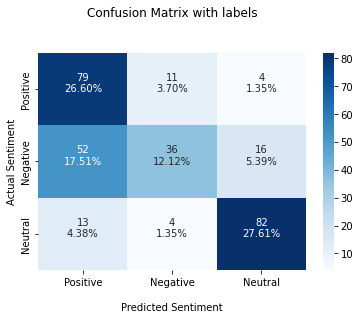

In [48]:
import seaborn as sns
#group_names = ['True Neg','False Pos','False Neg','True Pos','True Pos','True Pos','True Pos','True Pos','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n" for v1, v2 in
zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(3,3)
ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Sentiment')
ax.set_ylabel('Actual Sentiment');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Positive','Negative', 'Neutral'])
ax.yaxis.set_ticklabels(['Positive','Negative', 'Neutral'])
## Display the visualization of the Confusion Matrix.
plt.show()